### Erroen kokaeraren teknikan oinarritutako diseinua

Planta, berrelikadura unitariarekin

$G(s) = \frac{1}{(s+1)(s+2)}$

Espezifikazioak:

- Gaindiketa %10 baino txikiago

- Puntako denbora 1s

In [2]:
s=%s;
g=1/(s+1)/(s+2)

// GaindiketA %10
d=0.6;

T1=1;

   g  = 
       1       
   ----------  
   2 +3s +s^2  
     

Polo nagusien aukeraketa lortzeko espezifikazioak eta Erroen Kokaeraren azterketa (kontrol proportzionala erabiliz)

              

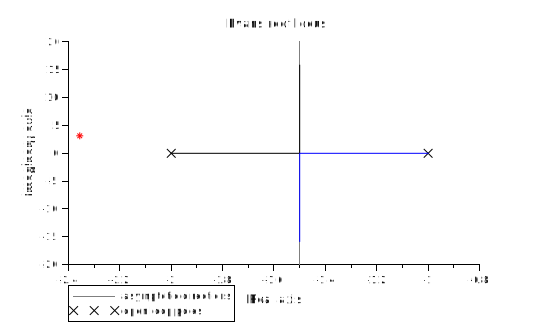

In [20]:
%plot inline
//T1=%pi/wd

wd=%pi/T1;

//wd=wn*sqrt(1-d^2)

wn=wd/sqrt(1-d^2);
s0=-d*wn+wn*sqrt(d^2-1);

//s0 in EK

scf(1);clf()
evans(g,250)
plot(real(s0),imag(s0),'*r')

EKn ikusten da polo desiratua hurrun dagoela eta zero baten bitartez (PD bat) adarrak erakarri ahal dira, punto horietatik pasatzeko

$PD = K_p (1+ T_d s)$

- Erabiltzen da fase baldintza $T_d$ kalkulatzeko, ikusiz ze fasea gehitu behar den $s_0$ puntuan.

- Gero, modulu baldintza erabiltzen da $K_p$ kalkulatzeko.

  db  = 
  -20.683620
 phi  = 
   150.18204
     Td  = 
   0.1275878
    db  = 
  -22.555864
 phi  = 
   180.
       Kp  = 
   13.421257
     gitxia  = 
     13.421257 +1.712389s     
   -------------------------  
   15.421257 +4.712389s +s^2  
  
  "Polo desiratua"

  -2.3561945 + 3.1415927i
 
  "Begizta itxiko poloak"

  -2.3561945 + 3.1415927i
  -2.3561945 - 3.1415927i


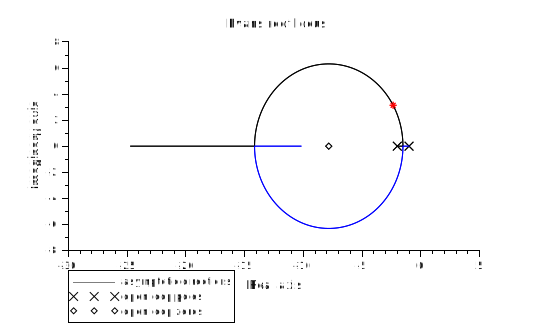

In [24]:
%plot inline
[db,phi]=dbphi(horner(g,s0))

// Behar den fasea, fase baldintza lortzeko
pha=(180-phi)*%pi/180;
Td=1/(imag(s0)/tan(pha)-real(s0))

// Konprobazioa
[db,phi]=dbphi(horner((1+Td*s)*g,s0))

evans((1+Td*s)*g,250)
plot(real(s0),imag(s0),'*r')

// Moldulu baldintza lortzeko
Kp=1/abs(horner((1+Td*s)*g,s0))

pd=(1+Td*s);

gitxia=((Kp*pd*g)/.(1))

disp('Polo desiratua',s0)
disp('Begizta itxiko poloak',roots(gitxia.den))

In [ ]:
Denbora eremuko erantzuna

  WARNING: csim: Input argument #1 is assumed continuous time.
  

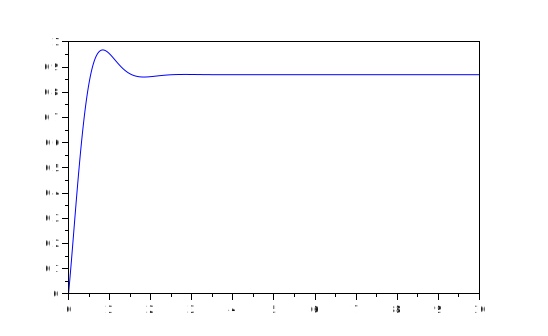

In [10]:
t=0:0.01:10;
y=csim('step',t,gitxia);

plot(t,y)

Hobetzeko egonkorreko errorea, hau da, prezisioa PI kontrolagailu bat ipintzeko.

Horretarako, zero ez da hurrun ipintzen jatorritik, ez aldatzeko fase baldintza.

$\frac1{T_i} = -real(s_0)/10$

  Ti  = 
   2.1220659
     Kp  = 
   14.385791
    
  "Begizta itxiko poloak"
  ans  =
  -2.3561945 + 3.1415927i
  -2.3561945 - 3.1415927i
  WARNING: csim: Input argument #1 is assumed continuous time.
  

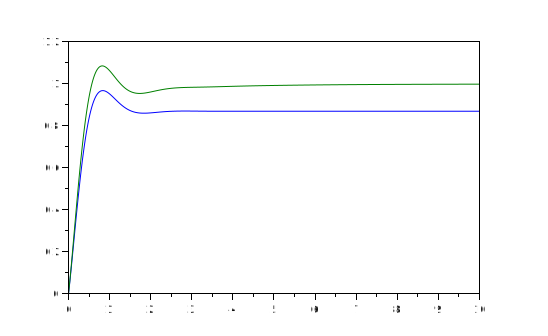

In [16]:
Ti=1/(-real(s0)/10)*0.5
pi=(1+1/Ti/s);

// Berriro modulu baldintza kalkulatzen da
Kp=1/abs(horner(pi*pd*g,s0))

// Poloen kalkuluaDenbora eremuko simulazioa
gitxia1=((Kp*pi*pd*g)/.(1));
disp('Begizta itxiko poloak')
roots(gitxia.den)
//Denbora eremuko simulazioa
y1=csim('step',t,gitxia1);

plot(t,y,t,y1)
